# Clustering Quality

In [ ]:
import numpy as np
import pandas as pd

### Sample Data
Cluster and class asisgnments shown in the following image

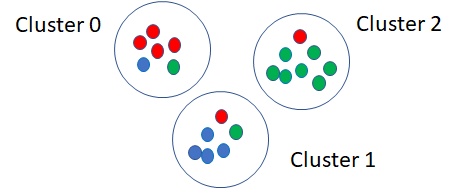

In [ ]:
class_assignment = np.array(["red","blue","green","red","red","blue","blue","red","blue","red",
                             "green","green","green","green","green","green","green","blue","green","red"])
cluster_assignment = np.array([0,1,2,0,0,1,1,0,0,2,
                               0,2,2,2,2,2,2,1,1,1])

### Purity Calculation

In [ ]:
def purity(cluster_assignment,class_assignment):
    nsample = np.size(cluster_assignment)
    # determine cluster labels
    array_cluster_label = np.unique(cluster_assignment)
    total_number = 0
    for cluster in array_cluster_label:
        # determine indices for cluster
        idx_cluster = np.where(np.absolute(cluster_assignment - cluster)<1e-5)[0]
        # count number of times each class appears in cluster
        values,count = np.unique(class_assignment[idx_cluster],return_counts=True)
        print("Cluster: {}  values: {}  count: {}".format(cluster,values,count))
        # add maximum number
        total_number += np.max(count)
    return total_number/nsample

In [ ]:
purity_value = purity(cluster_assignment,class_assignment)
print("Purity: {}".format(purity_value))

### Bar Chart using Dataframe in Pandas
Create data frame based on cluster label and class label for each data point

In [ ]:
nsample = np.size(cluster_assignment)
ncluster = np.size(np.unique(cluster_assignment))
print("Number of Samples: {}".format(nsample))
print("Number of Clusters: {}".format(ncluster))
df = pd.DataFrame({"clusterlabel": cluster_assignment,
                   "classlabel": class_assignment, "cluster": np.ones(np.size(cluster_assignment))})
df.head(20)

Group by clusterlabel and classlabel and sum cluster value

In [ ]:
counts = df.groupby(["clusterlabel", "classlabel"]).sum()
counts.head(10)

Create bar chart version of counts

In [ ]:
fig = counts.unstack(level=0).plot(kind="bar", subplots=True,
                                   sharey=True, sharex=False,
                                   layout=(1,ncluster), 
                                   figsize=(8,4), legend=False)